# OnlineRetail

**Attributes**

● Invoice : A 6-digit invoice number uniquely assigned to each transaction. If this code starts with the letter 'C', it indicates cancellation.

● StockCode: Product (goods) code. A 5 digit number that is uniquely assigned to each different product.

● Description: Product name.

● Quantity: The total quantity of each product per transaction.

● InvoiceDate: Invoice date and time, namely the day and time
transaction is created.

● UnitPrice : Unit price or product price per unit in sterling (£).

● CustomerID : A 5-digit number uniquely assigned to each customer.

● Country: Name of the country where the customer lives.

In [1]:
#import library
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#import data
# col_names = ['Invoice', 'StockCode','Description', 'Quantity', 'InvoiceDate', 'Price', 'Customer ID', 'Country']
df = pd.read_csv(r'E:\_Portofolio\PortofolioProject\OnlineRetail\online_retail.csv',on_bad_lines='skip')
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,RECORD FRAME 7 SINGLE SIZE,48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [3]:
df.tail()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
14720,580501,22169,FAMILY ALBUM WHITE PICTURE FRAME,1,2011-12-04 13:00:00,8.50,14546.0,United Kingdom
14721,580501,23284,DOORMAT KEEP CALM AND COME IN,2,2011-12-04 13:00:00,8.25,14546.0,United Kingdom
14722,580501,22507,MEMO BOARD RETROSPOT DESIGN,3,2011-12-04 13:00:00,4.95,14546.0,United Kingdom
14723,580502,22469,HEART OF WICKER SMALL,3,2011-12-04 13:15:00,1.65,16931.0,United Kingdom
14724,580502,23489,VINTAGE BELLS GARLAND,2,2011-12-04 13:15:00,2.89,16931.0,United Kingdom


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14725 entries, 0 to 14724
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Invoice      14725 non-null  object 
 1   StockCode    14725 non-null  object 
 2   Description  14678 non-null  object 
 3   Quantity     14725 non-null  int64  
 4   InvoiceDate  14725 non-null  object 
 5   Price        14725 non-null  float64
 6   Customer ID  11665 non-null  object 
 7   Country      14719 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 920.4+ KB


In [5]:
df.isnull().sum()

Invoice           0
StockCode         0
Description      47
Quantity          0
InvoiceDate       0
Price             0
Customer ID    3060
Country           6
dtype: int64

In [6]:
#Create a new column with the name Year which contains the year value of the Invoice Date
#InvoiceDate column data type becomes 'datetime' type
date_col = pd.DatetimeIndex(df['InvoiceDate']) 
df['Year'] = date_col.year
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Year
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,2009
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009
3,489434,22041,RECORD FRAME 7 SINGLE SIZE,48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,2009
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,2009


In [7]:
df['Year'].dtypes

dtype('int64')

In [8]:
df['Year'].isnull().sum()

0

In [9]:
df.dropna(how = 'any' , inplace = True)

In [10]:
df['Year'] = df['Year'].astype('int32')

In [11]:
df['Year'].dtypes

dtype('int32')

In [12]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Year
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,2009
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009
3,489434,22041,RECORD FRAME 7 SINGLE SIZE,48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,2009
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,2009


In [13]:
#Create filtering data with the conditions below and save it in a new variable, for example sales
Quantity_filter = df[(df['Quantity'] >0)]
sales_df = Quantity_filter

In [14]:
if sales_df['Invoice'].str.contains('C').any():
  print('True')

In [15]:
substring = 'C'
filter = sales_df['Invoice'].str.contains(substring)
Invoice_filter = sales_df[~filter]

In [16]:
sales_df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Year
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,2009
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009
3,489434,22041,RECORD FRAME 7 SINGLE SIZE,48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,2009
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,2009
...,...,...,...,...,...,...,...,...,...
14720,580501,22169,FAMILY ALBUM WHITE PICTURE FRAME,1,2011-12-04 13:00:00,8.50,14546.0,United Kingdom,2011
14721,580501,23284,DOORMAT KEEP CALM AND COME IN,2,2011-12-04 13:00:00,8.25,14546.0,United Kingdom,2011
14722,580501,22507,MEMO BOARD RETROSPOT DESIGN,3,2011-12-04 13:00:00,4.95,14546.0,United Kingdom,2011
14723,580502,22469,HEART OF WICKER SMALL,3,2011-12-04 13:15:00,1.65,16931.0,United Kingdom,2011


In [17]:
#There is no Quantity has 0 or minus value
sales_df['Quantity'].describe() 

count    11363.000000
mean        15.373757
std         51.279856
min          1.000000
25%          2.000000
50%          5.000000
75%         12.000000
max       1500.000000
Name: Quantity, dtype: float64

In [18]:
#Invoice column does not contain the letter 'C' (no canclation)
if sales_df['Invoice'].str.contains('C').any():
  print('True')
else:
  print('None')

None


In [19]:
#Create a new column called Revenue with the Quantity value multiplied by Price
new_col = sales_df['Quantity']*sales_df['Price']
sales_df['Revenue'] = new_col
sales_df.head()

C:\Users\USER\AppData\Local\Temp\ipykernel_10020\2697041072.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales_df['Revenue'] = new_col


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Year,Revenue
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,2009,83.4
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009,81.0
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009,81.0
3,489434,22041,RECORD FRAME 7 SINGLE SIZE,48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,2009,100.8
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,2009,30.0


In [20]:
sales_df.tail()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Year,Revenue
14720,580501,22169,FAMILY ALBUM WHITE PICTURE FRAME,1,2011-12-04 13:00:00,8.50,14546.0,United Kingdom,2011,8.50
14721,580501,23284,DOORMAT KEEP CALM AND COME IN,2,2011-12-04 13:00:00,8.25,14546.0,United Kingdom,2011,16.50
14722,580501,22507,MEMO BOARD RETROSPOT DESIGN,3,2011-12-04 13:00:00,4.95,14546.0,United Kingdom,2011,14.85
14723,580502,22469,HEART OF WICKER SMALL,3,2011-12-04 13:15:00,1.65,16931.0,United Kingdom,2011,4.95
14724,580502,23489,VINTAGE BELLS GARLAND,2,2011-12-04 13:15:00,2.89,16931.0,United Kingdom,2011,5.78


In [21]:
#Average Revenue per year 27.309884
sales_df.describe()

,Quantity,Price,Year,Revenue
count,11363.000000,11363.000000,11363.000000,11363.000000
mean,15.373757,3.216411,2009.964358,27.309884
std,51.279856,11.111372,0.798727,89.723827
min,1.000000,0.000000,2009.000000,0.000000
25%,2.000000,1.250000,2009.000000,4.950000
50%,5.000000,2.080000,2010.000000,11.900000
75%,12.000000,3.750000,2011.000000,19.800000
max,1500.000000,780.520000,2011.000000,2685.000000


In [22]:
avg_revenue_per_year = sales_df.groupby('Year')['Revenue'].mean()

In [23]:
avg_revenue_per_year

Year
2009    21.216401
2010    40.393480
2011    18.479224
Name: Revenue, dtype: float64

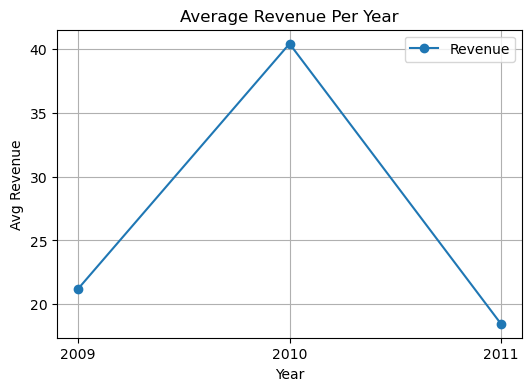

In [24]:
avg_revenue_per_year.plot(
    title='Yearly Average Revenue',
    xlabel='Year',
    ylabel='Revenue (£)',
    marker='o',
    figsize=(6, 4),
    xticks=avg_revenue_per_year.index
)
plt.ylabel('Avg Revenue')
plt.xlabel('Year')
plt.title('Average Revenue Per Year')
plt.legend(loc = 'upper right') 
plt.grid() 

From the graph shown above, it can be seen that there was a rapid increase in the number of revenue in 2010.

In [37]:
df['Customer ID'].isnull().sum()

0

In [26]:
finished = df[df['Customer ID'].notna()]
finished

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Year
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,2009
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009
3,489434,22041,RECORD FRAME 7 SINGLE SIZE,48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,2009
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,2009
...,...,...,...,...,...,...,...,...,...
14720,580501,22169,FAMILY ALBUM WHITE PICTURE FRAME,1,2011-12-04 13:00:00,8.50,14546.0,United Kingdom,2011
14721,580501,23284,DOORMAT KEEP CALM AND COME IN,2,2011-12-04 13:00:00,8.25,14546.0,United Kingdom,2011
14722,580501,22507,MEMO BOARD RETROSPOT DESIGN,3,2011-12-04 13:00:00,4.95,14546.0,United Kingdom,2011
14723,580502,22469,HEART OF WICKER SMALL,3,2011-12-04 13:15:00,1.65,16931.0,United Kingdom,2011


In [27]:
df['Invoice'].str.contains('C').sum()

296

In [28]:
cancel = df[df['Invoice'].str.contains('C')]
cancel

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Year
174,C489449,22087,PAPER BUNTING WHITE LACE,-12,2009-12-01 10:33:00,2.95,16321.0,Australia,2009
175,C489449,85206A,CREAM FELT EASTER EGG BASKET,-6,2009-12-01 10:33:00,1.65,16321.0,Australia,2009
176,C489449,21895,POTTING SHED SOW 'N' GROW SET,-4,2009-12-01 10:33:00,4.25,16321.0,Australia,2009
177,C489449,21896,POTTING SHED TWINE,-6,2009-12-01 10:33:00,2.10,16321.0,Australia,2009
178,C489449,22083,PAPER CHAIN KIT RETRO SPOT,-12,2009-12-01 10:33:00,2.95,16321.0,Australia,2009
...,...,...,...,...,...,...,...,...,...
12728,C580313,22649,STRAWBERRY FAIRY CAKE TEAPOT,-3,2011-12-02 15:10:00,4.95,12668.0,Germany,2011
12729,C580313,22419,LIPSTICK PEN RED,-6,2011-12-02 15:10:00,0.42,12668.0,Germany,2011
12730,C580313,22303,COFFEE MUG APPLES DESIGN,-2,2011-12-02 15:10:00,2.55,12668.0,Germany,2011
12731,C580313,21232,STRAWBERRY CERAMIC TRINKET POT,-3,2011-12-02 15:10:00,1.25,12668.0,Germany,2011


In [29]:
#The number of successful and canceled transactions for each year
finished_order = finished.groupby('Year').size()
canceled_order = cancel.groupby('Year').size()
transaction = pd.concat([finished_order, canceled_order], axis=1, keys=['Finished','Canceled'])
transaction

,Finished,Canceled
Year,,
2009,3957,123
2010,4230,130
2011,3472,43


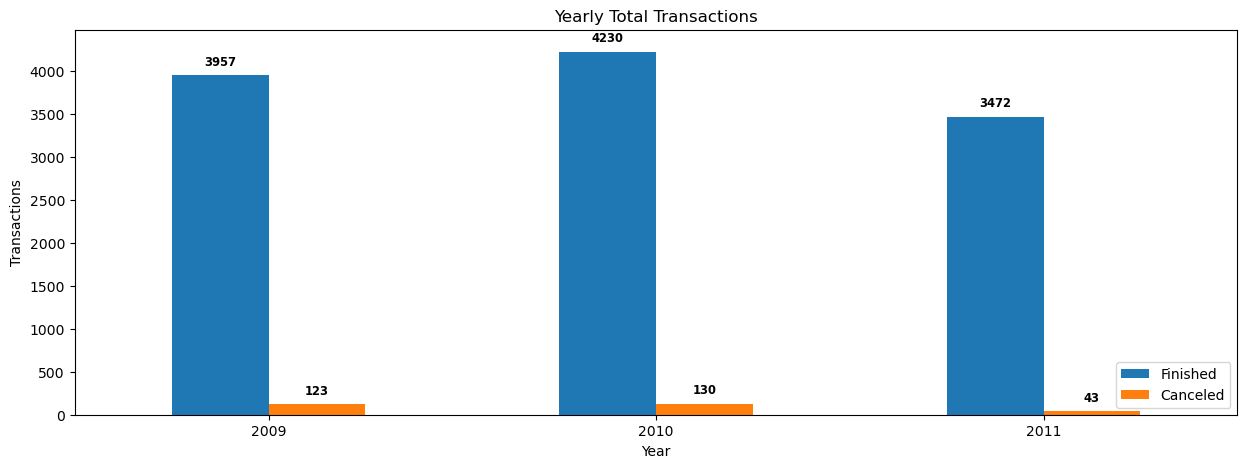

In [30]:
ax = transaction.plot.bar(
    title='Yearly Total Transactions',
    xlabel='Year',
    ylabel='Transactions',
    figsize=(15, 5)
)
for container in ax.containers:
    ax.bar_label(container, padding=5, fontsize='small', fontweight='bold')
plt.xticks(rotation=0)
plt.margins(.06)
plt.legend(loc='lower right')
plt.show()

In [31]:
total_transaction = df.groupby('Year')['Customer ID'].nunique()
total_transaction

Year
2009    191
2010    195
2011    146
Name: Customer ID, dtype: int64

In [32]:
cancel_transaction = cancel.groupby('Year')['Customer ID'].nunique()
cancel_transaction

Year
2009    47
2010    46
2011    12
Name: Customer ID, dtype: int64

In [33]:
#Cancellation rate for each year
cancel_rate_yearly = pd.concat([total_transaction, cancel_transaction], axis=1, keys=['Total', 'Cancel'])
cancel_rate_yearly

,Total,Cancel
Year,,
2009,191,47
2010,195,46
2011,146,12


In [34]:
cancel_rate = cancel_rate_yearly['Cancel']/cancel_rate_yearly['Total'] * 100
cancel_rate

Year
2009    24.607330
2010    23.589744
2011     8.219178
dtype: float64

In [35]:
cancel_rate_yearly['Rate'] = cancel_rate
cancel_rate_yearly

,Total,Cancel,Rate
Year,,,
2009,191,47,24.607330
2010,195,46,23.589744
2011,146,12,8.219178


<Axes: title={'center': 'Customer Cancellation Rate Per Year'}, xlabel='Year', ylabel='Rate (%)'>

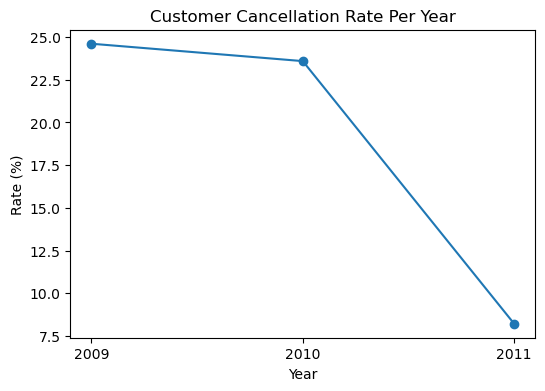

In [36]:
cancel_rate_yearly['Rate'].plot(
    title='Customer Cancellation Rate Per Year',
    xlabel='Year',
    ylabel='Rate (%)',
    marker='o',
    figsize=(6, 4),
    xticks=cancel_rate_yearly.index
)

# **Conclusion**

From the graph shown above, it can be seen that there was a rapid increase in the number of transactions in 2010, both successful transactions and canceled transactions. After that there was a decline in the following year (2011).

The same thing can also be seen in the customer cancellation rate graph. However, if the cancellation rate is calculated based on the number of transactions, it is found that the percentage is decreasing every year. When we review the changes between the number of successful and canceled transactions each year, we still see the same pattern, namely a rapid increase in 2010 and a decline again in 2011.